In [9]:
import numpy as np
from scipy.special import gamma
from scipy.special import legendre
from scipy.special import roots_legendre
import orth_pol_q,orth_pol_px
from math import pi
from numpy import exp
from scipy import integrate

TypeError: orth_ab() got an unexpected keyword argument 'sigma'

In [2]:
def Test_fcn(N_test,x):
    test_total = []
    for n in range(0,N_test):
        test  = legendre(n)(x)
        # Jacobi(degree, alpha, beta)(x)
        test_total.append(test)
    return np.asarray(test_total)

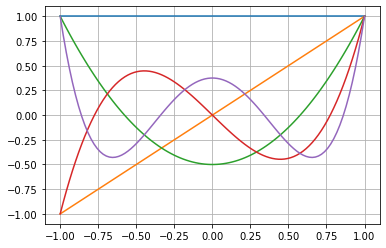

In [3]:
X = np.linspace(-1,1,100)
test_fun = Test_fcn(5,X)
import matplotlib.pyplot as plt
for i in range(5):
    plt.plot(X,test_fun[i])
    plt.grid()

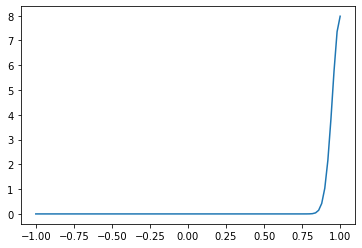

In [4]:
sigma = 0.05
c = 1
f = lambda x: (1/(sigma*(2*pi)**0.5))*exp(-(x - c)**2/(2*sigma**2))

F = f(X)
plt.plot(X,F)

In [5]:
def function_pi(poly_k):
    # k goes from 0 to j-1 in the for loop 
        def fun_pi(i1,pol_i1):
            return lambda x: (x**i1)*pol_i1

        def summer_funcs(args):
            return lambda x: sum(fun_pi(*a)(x) for a in args)

        arguments = []
        for i1 in range(len(poly_k)+1): # len(poly_k) = max_pol_deg
            deg = i1
            pol_i1 = poly_k[i1]
            arguments.append((deg,pol_i1))

        p_i = summer_funcs(arguments)

        return p_i
    
def gauss_quad(func,left,right,N_quad):
    [x_quad, w_quad] = roots_legendre(N_quad)
    x_quad_new = left + (right-left)/2*(x_quad+1)
    coef = (right - left)/2
    summation = 0
    approx = sum(w_quad*func(x_quad))
    return approx

In [26]:
phi = legendre(30)
phi = function_pi(phi)
func = lambda x: phi(x)*f(x)

gauss_aprrox = gauss_quad(func,-1,1,90)
print(gauss_aprrox)

-0.00029336069112520687


In [27]:
normal_quad= integrate.quad(func,-1,1)
print(normal_quad)

(-0.0002934429921073725, 1.1255906580072286e-07)


/var/folders/tj/20hjj3p93ls3rkc91pc6nmb40000gn/T/ipykernel_45195/1108799543.py:1: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  normal_quad= integrate.quad(func,-1,1)


In [28]:
print(gauss_aprrox - normal_quad[0])

8.230098216561316e-08


In [19]:
set_a = [1,1]
d = 2
print(set_a)
[set_a.append(0) for i in range(d-2)]
print(set_a)

[1, 1]
[1, 1]
